In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [20]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc
from flask import Flask, jsonify

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
latest_date

('2017-08-23')

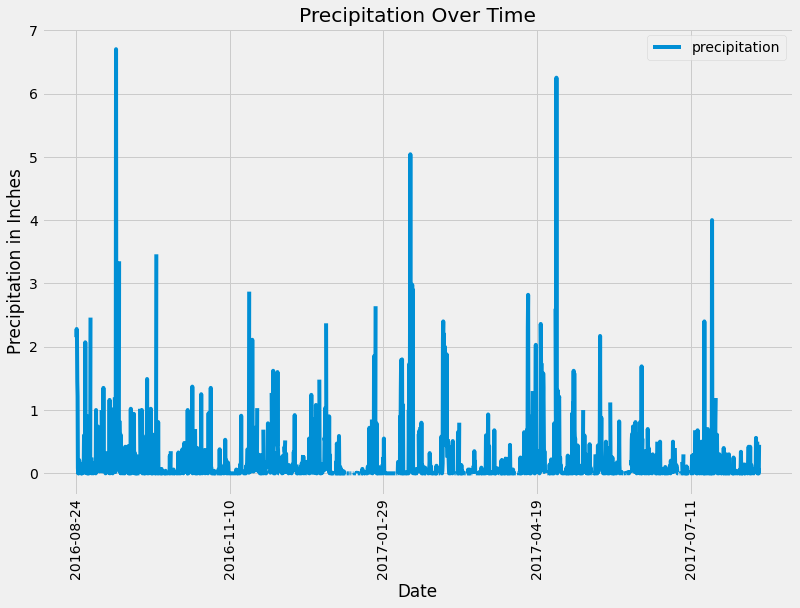

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
months12_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
months12_ago

# Perform a query to retrieve the data and precipitation scores
last_12_months = session.query(measurement.date, measurement.prcp).\
                    filter(measurement.date > months12_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
last12_df = pd.DataFrame(last_12_months, columns=["date", "precipitation"]).set_index('date')

# Sort the dataframe by date
prcp_df = last12_df.sort_index(ascending = True)


# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(figsize = (12, 8), rot = 90, title = 'Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation in Inches')
plt.show()





In [17]:
prcp_df

,precipitation
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()


,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(measurement).group_by(measurement.station).count()

station_count

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(func.count(measurement.id), measurement.station).group_by(measurement.station).\
    order_by(desc(func.count(measurement.id))).all()

station_activity



[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
    
max_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

print(f'Station USC00519281 Min Temp: {min_temp}')
print(f'Station USC00519281 Max Temp: {max_temp}')
print(f'Station USC00519281 Average Temp: {avg_temp}')

Station USC00519281 Min Temp: [(54.0,)]
Station USC00519281 Max Temp: [(85.0,)]
Station USC00519281 Average Temp: [(71.66378066378067,)]


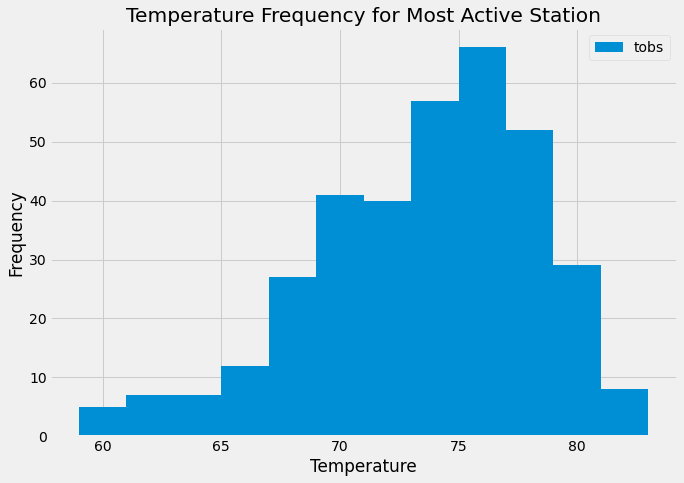

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Perform a query to retrieve the data and precipitation scores
last_12_tobs = session.query(measurement.station, measurement.date, measurement.tobs).\
                    filter(measurement.date > months12_ago).\
                    filter(measurement.station == 'USC00519281').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
last12_tobs_df = pd.DataFrame(last_12_tobs, columns=["station", "date", "tobs"]).set_index('date')

plt.figure(figsize = (10,7))
plt.hist(last12_tobs_df['tobs'], bins=12)  # density=False would make counts
plt.title('Temperature Frequency for Most Active Station')
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.legend(['tobs'])


plt.show()


# Close session

In [16]:
# Close Session
session.close()